In [1]:
import sys
import numpy as np
import datetime
%pylab inline
from os import listdir, path, chdir

Populating the interactive namespace from numpy and matplotlib


In [2]:
target_folder = datetime.datetime.now().strftime("%m-%d-%Y")
data_folder = "/home/photon/data/"+target_folder
sys.path.append("/home/photon/code/Qfunction/")
chdir(data_folder)
import Qfunction as Q

OSError: [Errno 2] No such file or directory: '/home/photon/data/06-21-2017'

In [3]:
#Use this to pull from a different day:
data_folder = "/home/photon/data/06-20-2017"
sys.path.append("/home/photon/code/Qfunction/")
chdir(data_folder)
import Qfunction as Q

In [4]:
allFiles = listdir(data_folder)
allFiles.sort()
allFiles

['11-28-18_raw.npz',
 '11-32-15_raw.npz',
 '11-35-37_raw.npz',
 '11-49-29_raw.npz',
 '11-54-15_raw.npz',
 '12-29-54_raw.npz',
 '15-28-37_raw.npz',
 '15-37-05_raw.npz',
 '15-46-56_raw.npz',
 '15-58-21_raw.npz',
 '16-04-06_raw.npz',
 '16-09-39_raw.npz',
 '16-15-33_raw.npz']

In [73]:
#Import last file in folder (by default)
data_npz = np.load(allFiles[-5])
VacCorrected = data_npz['VacCorrected']
ncount = data_npz['ncount']

In [74]:
n = np.sqrt(ncount)
print "Std dev. of LO: ", n.std()/n.mean()
print "Peak to Peak as fraction of LO mean: ", (n.max()-n.min())  / n.mean()

Std dev. of LO:  0.00348786871099
Peak to Peak as fraction of LO mean:  0.0211444352777


In [75]:
scaled_vc = np.sqrt(2.0/ncount)*VacCorrected

In [76]:
avg_n_quick = [0.5*(np.mean(np.abs(scaled_vc[i,:,:].flatten('F'))))**2 for i in range(300)]

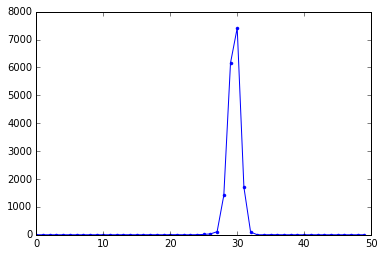

In [77]:
plot(avg_n_quick[200:250],".-")  # look at the modes with their amplitudes

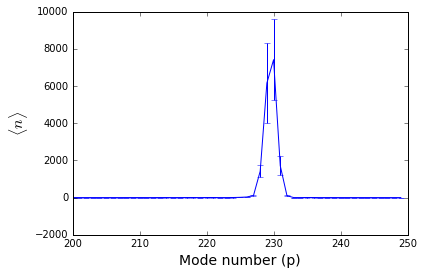

In [78]:
start = 200
stop = 250
std_dev_n = np.zeros(300)
avg_n = np.zeros(300)
for i in range(start,stop):
    x = np.real(scaled_vc[i,:,:].flatten('F'))
    y = np.imag(scaled_vc[i,:,:].flatten('F'))
    std_dev_n[i] = Q.std_n_raw(x,y)
    avg_n[i] = Q.avg_n_raw(x,y)

errorbar(arange(start,stop,1),avg_n[start:stop],yerr=std_dev_n[start:stop])
xlabel("Mode number (p)",size=14)
ylabel("$\\langle n \\rangle$",size=16)

In [79]:
mode = 230
check_n = 0.5*(np.abs(scaled_vc[mode,:,:].mean(axis=0)))**2  # look at the abs of one mode averaged over all shots per round:
check_var = (np.abs(scaled_vc[mode,:,:]).std(axis=0))**2

Check the average photon number for each of the rounds. Hopefully the output is stable over these longer time scales.

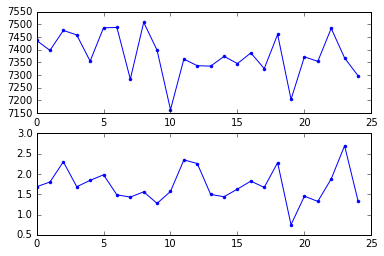

In [80]:
subplot(211)
plot(check_n,".-")
#ylim(ymin=0)
subplot(212)
plot(check_var,".-")
#ylim(ymin=0)

Now pick the slice of rounds to analyze

In [81]:
output = scaled_vc[mode,:,0:14].flatten('F')

In [82]:
x = np.real(output)
y = np.imag(output)

Average amplitude: 121.793717


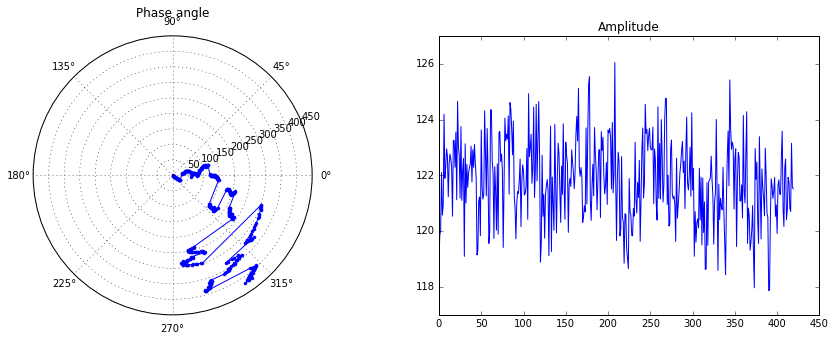

In [84]:
# Look at the average amplitude and a plot of phase angle and amplitude vs. shot number:
fig = plt.figure(figsize=(15, 5))
plt.subplot(121, polar=True)
plt.plot(angle(output),np.arange(len(output)),".-")
plt.title("Phase angle")
plt.subplot(122)
#plt.ylim(0,20)
plt.plot(abs(output))
plt.title("Amplitude")
print "Average amplitude: %f" % np.average(abs(output))

In [85]:
0.5*(np.abs(output).mean())**2  # the easy calculation

7416.8547708208444

In [86]:
n = Q.avg_n_raw(x,y)  # the estimated photon number from x and y
n

7417.9254029793728

In [87]:
X,Y,Z = Q.kernel_estimate(x,y)

('KDE kernel factor: ', 0.36541955544943988)


In [88]:
print "<n_Q> = ",Q.avg_n(X,Y,Z)  # the calculated from Q function
print "<n_Q-raw> = ", Q.avg_n_raw(x,y)
print "StDev n = ", Q.std_n(X,Y,Z)
print "StDev n raw = ", Q.std_n_raw(x,y)

<n_Q> =  1358.20519432
<n_Q-raw> =  7417.92540298
StDev n =  2832.34682395
StDev n raw =  2393.66820628


In [89]:
print "Kernel estimate noise as percent: %0.2f" % ((Q.std_n(X,Y,Z) / sqrt(Q.avg_n(X,Y,Z)) - 1)*100)
print "Raw quadratures noise as percent: %0.2f" % ((Q.std_n_raw(x,y) / sqrt(Q.avg_n_raw(x,y)) - 1)*100)

Kernel estimate noise as percent: 7585.35
Raw quadratures noise as percent: 2679.22


('KDE kernel factor: ', 0.36541955544943988)


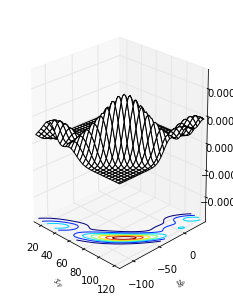

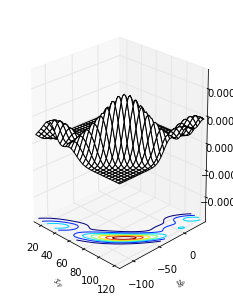

In [90]:
Q.qsurf(x,y)  # good looking figures though!

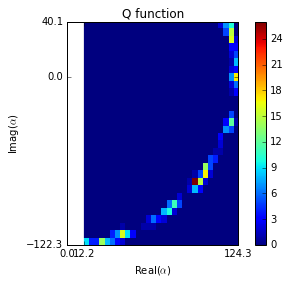

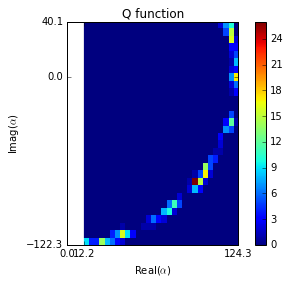

In [91]:
Q.qfuncimage(output)